<a href="https://colab.research.google.com/github/YISHU19/Personal/blob/branch/DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train0, y_train0),(x_test0, y_test0) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
x_train = x_train0 / 255.0
x_test = x_test0 / 255.0

In [4]:
x_train.shape

(50000, 32, 32, 3)

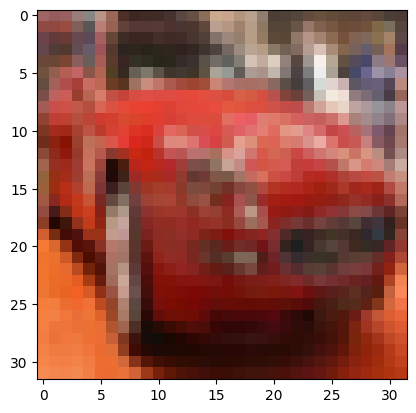

In [5]:
img = Image.fromarray(x_train0[5])
plt.imshow(img)

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train0, y_train0, batch_size=128, epochs=10)

Epoch 1/10
391/391 [==============================] - 18s 42ms/step - loss: 33.5810 - accuracy: 0.1863
Epoch 2/10
391/391 [==============================] - 16s 41ms/step - loss: 3.4923 - accuracy: 0.2455
Epoch 3/10
391/391 [==============================] - 17s 44ms/step - loss: 2.2320 - accuracy: 0.3029
Epoch 4/10
391/391 [==============================] - 16s 41ms/step - loss: 2.0267 - accuracy: 0.3293
Epoch 5/10
391/391 [==============================] - 16s 42ms/step - loss: 1.9172 - accuracy: 0.3445
Epoch 6/10
391/391 [==============================] - 19s 48ms/step - loss: 1.8526 - accuracy: 0.3612
Epoch 7/10
391/391 [==============================] - 16s 42ms/step - loss: 1.8011 - accuracy: 0.3725
Epoch 8/10
391/391 [==============================] - 16s 41ms/step - loss: 1.7722 - accuracy: 0.3796
Epoch 9/10
391/391 [==============================] - 16s 41ms/step - loss: 1.7659 - accuracy: 0.3803
Epoch 10/10
391/391 [==============================] - 17s 44ms/step - loss: 1.77

In [9]:
scores = model.evaluate(x_test0, y_test0, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 7ms/step - loss: 1.7496 - accuracy: 0.3680
Test loss: 1.7496453523635864
Test accuracy: 0.36800000071525574


In [10]:
predictions = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


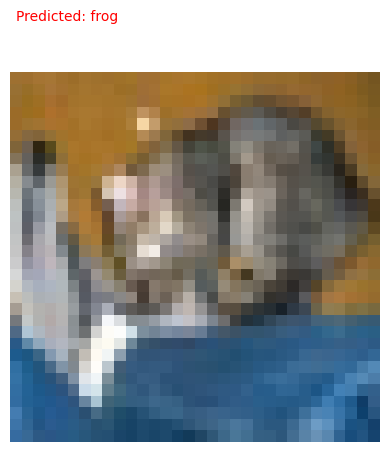

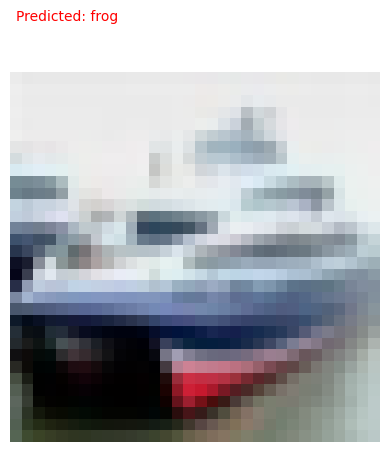

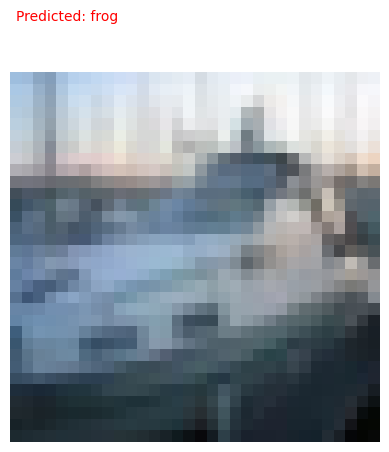

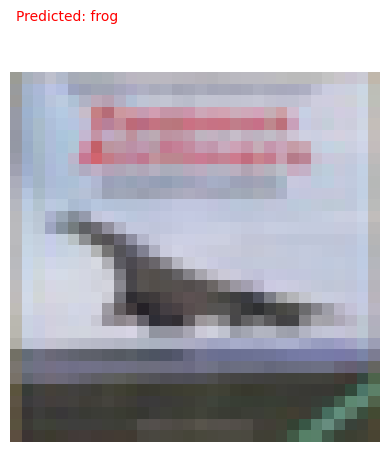

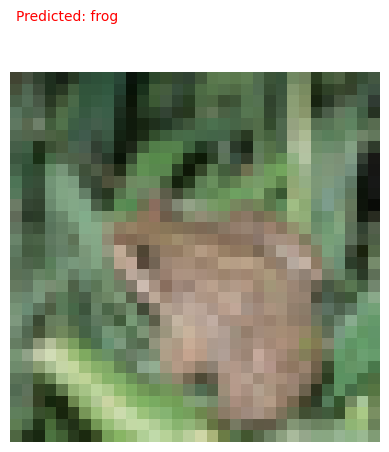

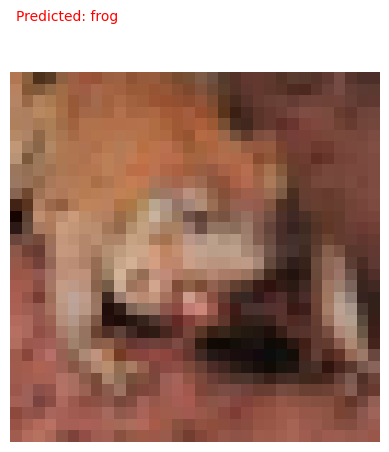

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

for i in range(6):
    img = Image.fromarray(x_test0[i], "RGB")
    plt.imshow(img)
    predicted_label = np.argmax(predictions[i])
    #print(classes[predicted_label])
    plt.text(0, -5, f"Predicted: {classes[predicted_label]}", color='red')  # Add predicted label as text
    plt.axis('off')  # Remove axis ticks
    plt.show()